# Генерация данных

In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### Задаем длину dataset

In [2]:
dataset_size = 20000


### Функция вычисляющая значение нашего выражения

In [3]:
def my_func(x, y):
    return torch.sin(x + 2*y) * torch.exp(-(2*x + y)**2)

In [4]:
def torch_gen_random(min, max):
        return (max-min)*torch.rand((20000)) + min

Генерируем dataset

In [5]:
x_tensor = torch_gen_random(-10,10)
y_tensor = torch_gen_random(-10,10)
z_tensor = my_func(x_tensor, y_tensor)

### Посмотрим наш dataset на графике

In [6]:
x_tesor_numpy = x_tensor.detach().cpu().numpy()
y_tensor_numpy = y_tensor.detach().cpu().numpy()
z_tensor_numpy = z_tensor.detach().cpu().numpy()

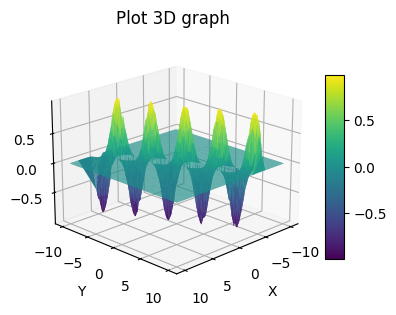

In [7]:
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=20, azim=45)
    surf = ax.plot_trisurf(x_tesor_numpy, y_tensor_numpy, z_tensor_numpy, cmap='viridis', label='Prediction')
    fig.colorbar(surf, shrink=0.5, aspect=10)
    plt.title("Plot 3D graph")
    plt.show() 

### Функция для сплита и сохранения

In [8]:
def split_tensor(tensor, split_positions ,text_postfix):
    tensor_train, tensor_test, tensor_validate = torch.tensor_split(tensor, split_positions)
    torch.save(tensor_train, 'train_' + text_postfix + '.pt')
    torch.save(tensor_train, 'test_' + text_postfix + '.pt')
    torch.save(tensor_train, 'validate_' + text_postfix + '.pt')


### Разбиваем и сохраняем

In [9]:
split_tensor(x_tensor,[14000, 17000], 'x')
split_tensor(y_tensor,[14000, 17000], 'y')
split_tensor(z_tensor,[14000, 17000], 'z')